In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("Concrete_data.csv")

In [4]:
df

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
df.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.tail()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [7]:
df.dtypes

Cement              float64
Blast               float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
CA                  float64
FA                  float64
Age                   int64
CMS                 float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CA                1030 non-null   float64
 6   FA                1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CMS               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
df.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
df.columns

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

In [11]:
#lets check the Null values
df.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

so we can see that there is no null values present in the data

# Checking the correlation

In [12]:
df_corr=df.corr()

In [13]:
df_corr

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [14]:
#lets Check it via visualization

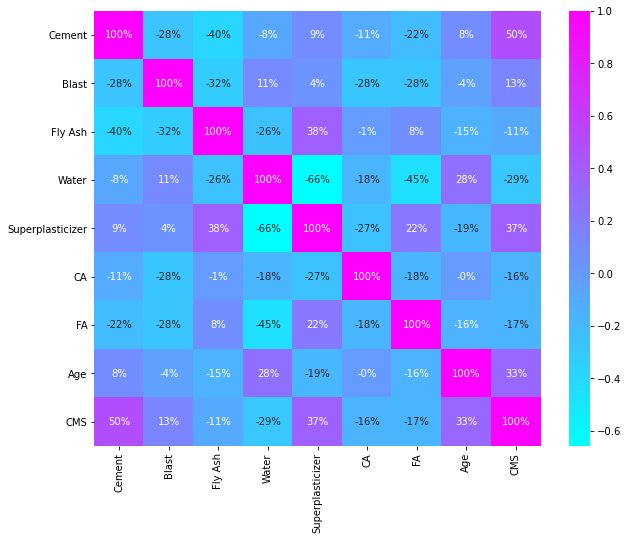

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,cmap='cool',annot=True,fmt='.0%')
plt.show()

In [16]:
#lets check the correlation with target column

Text(0.5, 1.0, 'correlation with target variable')

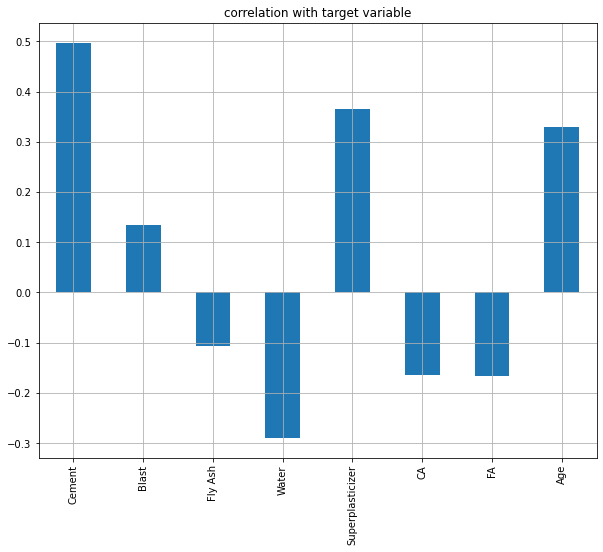

In [17]:
plt.figure(figsize=(10,8))
df.drop('CMS',axis=1).corrwith(df['CMS']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("correlation with target variable")

# DataVisualization

In [18]:
#Univariate Analysis

In [19]:
df.columns

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

In [20]:
#lets check the total count of cement

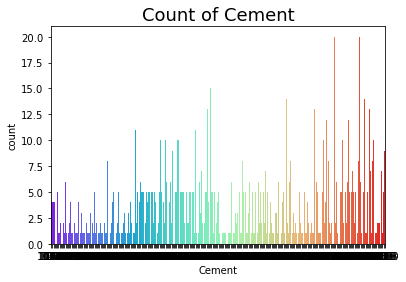

362.6    20
425.0    20
251.4    15
310.0    14
446.0    14
         ..
313.8     1
147.8     1
260.9     1
136.4     1
321.3     1
Name: Cement, Length: 278, dtype: int64


In [21]:
sns.countplot(x='Cement',data=df,palette='rainbow')
plt.title("Count of Cement",fontsize=18)
plt.show()
print(df['Cement'].value_counts())

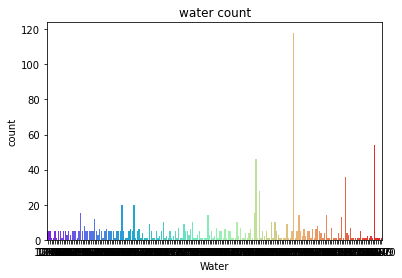

192.0    118
228.0     54
185.7     46
203.5     36
186.0     28
        ... 
127.0      1
166.7      1
191.3      1
172.4      1
177.6      1
Name: Water, Length: 195, dtype: int64


In [22]:
sns.countplot(x='Water',data=df,palette='rainbow')
plt.title("water count")
plt.show()
print(df['Water'].value_counts())

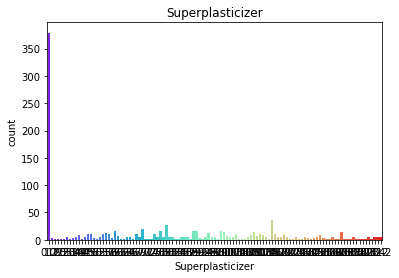

0.0     379
11.6     37
8.0      27
7.0      19
6.0      17
       ... 
8.8       1
8.4       1
10.7      1
13.1      1
15.3      1
Name: Superplasticizer, Length: 111, dtype: int64


In [23]:
sns.countplot(x='Superplasticizer',data=df,palette='rainbow')
plt.title("Superplasticizer")
plt.show()
print(df['Superplasticizer'].value_counts())

In [24]:
#bivariate Analysys

# Checking the skewvness

In [27]:
df.skew()

Cement              0.509481
Blast               0.800717
Fly Ash             0.537354
Water               0.074628
Superplasticizer    0.907203
CA                 -0.040220
FA                 -0.253010
Age                 3.269177
CMS                 0.416977
dtype: float64

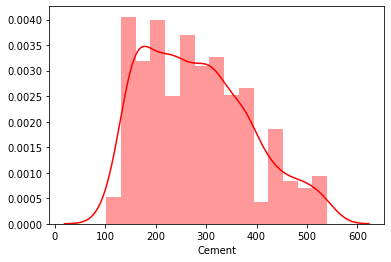

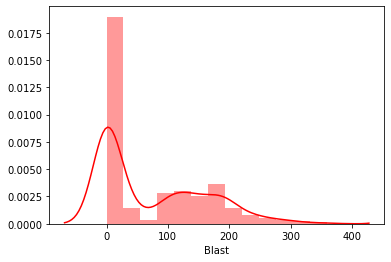

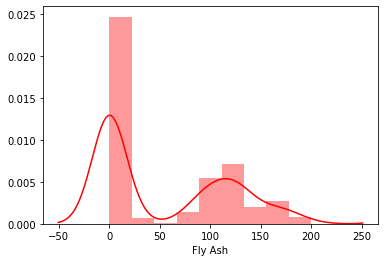

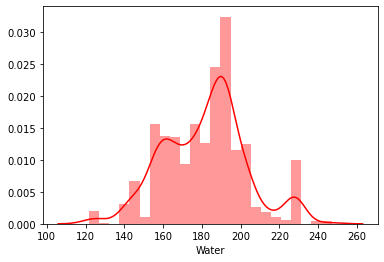

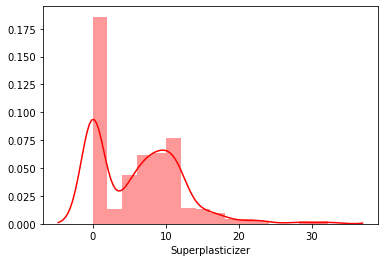

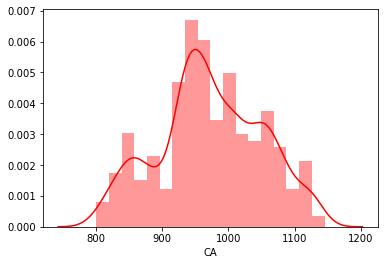

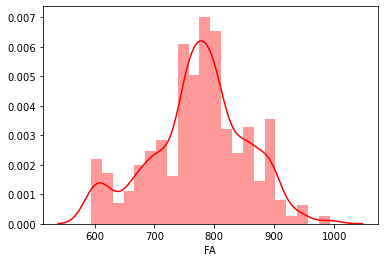

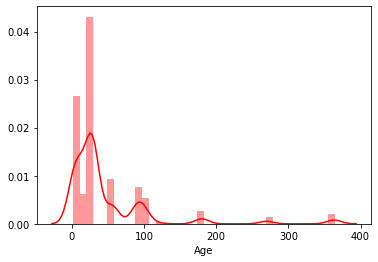

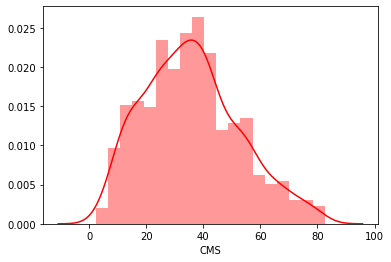

In [29]:
for col in df.describe().columns:
    sns.distplot(df[col],color='r')
    plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()

In [37]:
for col in df.columns:
    if df[col].dtype==np.number:
        continue
    df[col]=le.fit_transform(df[col])

In [38]:
df.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,4,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,4,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,11,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,13,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,12,44.30


In [39]:
df.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

# plotting outliers

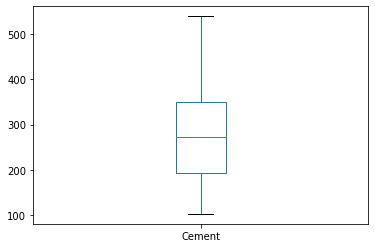

In [40]:
df['Cement'].plot.box()

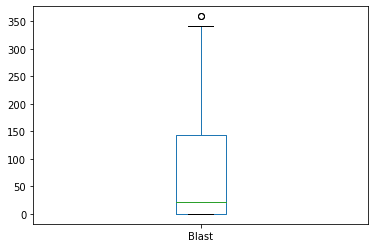

In [41]:
df['Blast'].plot.box()

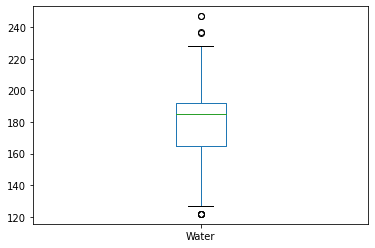

In [42]:
df['Water'].plot.box()

In [43]:
#Removing outliers

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.47791487, 0.85688789, 0.84714393, ..., 1.21767004, 0.0727761 ,
        2.64540763],
       [2.47791487, 0.85688789, 0.84714393, ..., 1.21767004, 0.0727761 ,
        1.56142148],
       [0.49142531, 0.79552649, 0.84714393, ..., 2.24091709, 2.76352473,
        0.26662698],
       ...,
       [1.27008832, 0.75957923, 0.85063487, ..., 0.0801067 , 0.0727761 ,
        0.72572939],
       [1.16860982, 1.30806485, 0.84714393, ..., 0.19116644, 0.0727761 ,
        0.18253855],
       [0.19403325, 0.30849909, 0.3769452 , ..., 0.15074782, 0.0727761 ,
        0.20469738]])

In [45]:
thresholds=3
print(np.where(z>3))

(array([  3,   4,   6,  17,  24,  30,  31,  34,  41,  42,  56,  66,  76,
        79,  99, 102, 122, 125, 145, 148, 168, 171, 553, 559, 571, 584,
       604, 610, 616, 620, 622, 769, 792, 814, 873, 936], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3], dtype=int64))


In [48]:
df_new=df[(z<3).all(axis=1)]

In [49]:
print(df.shape,"\t\t",df_new.shape)

(1030, 9) 		 (994, 9)


In [50]:
df=df_new

In [52]:
df.shape

(994, 9)

# Model Traing

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
df

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,4
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,4
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,11
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,6
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,4
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,4
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,4
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,4
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,4


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_State=55,text_size=0.22)

NameError: name 'x' is not defined